Write a program to implement the support Vector machine algorithm. Use Breast Cancer Wisconsin (Diagnostic) Dataset

Train size: 341
Validation size: 114
Test size: 114

MODEL PERFORMANCE:
Accuracy : 0.9824561403508771
Precision: 1.0
Recall   : 0.9523809523809523
F1 Score : 0.975609756097561

Confusion Matrix:
 [[72  0]
 [ 2 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



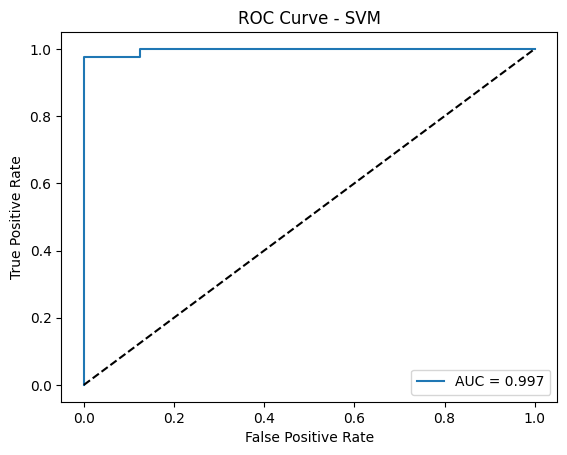

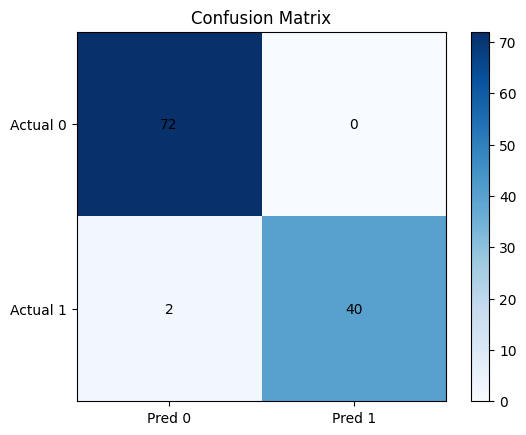

In [1]:
# ============================================
# 1️⃣ IMPORT LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)

# ============================================
# 2️⃣ LOAD DATASET
# ============================================
df = pd.read_csv(r"D:\B tech\Semester 5\ML\Practicals\dataset\breastcancer.csv")

# Remove unwanted columns
if "id" in df.columns:
    df = df.drop("id", axis=1)
if "Unnamed: 32" in df.columns:
    df = df.drop("Unnamed: 32", axis=1)

# Encode target variable (Malignant = 1, Benign = 0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Handle missing values
df = df.fillna(df.mean(numeric_only=True))

# Features and target
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

# ============================================
# 3️⃣ TRAIN / VALIDATION / TEST SPLIT (60/20/20)
# ============================================
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.40, random_state=42, stratify=Y
)

X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.50, random_state=42, stratify=Y_temp
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

# ============================================
# 4️⃣ FEATURE SCALING (IMPORTANT FOR SVM)
# ============================================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# ============================================
# 5️⃣ TRAIN SVM MODEL
# ============================================
model = SVC(kernel="rbf", probability=True)  # RBF kernel is best for this dataset
model.fit(X_train, Y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ============================================
# 6️⃣ EVALUATION METRICS
# ============================================
acc  = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec  = recall_score(Y_test, y_pred)
f1   = f1_score(Y_test, y_pred)
cm   = confusion_matrix(Y_test, y_pred)

print("\nMODEL PERFORMANCE:")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# ============================================
# 7️⃣ ROC CURVE
# ============================================
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

# ============================================
# 8️⃣ CONFUSION MATRIX HEATMAP
# ============================================
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["Actual 0", "Actual 1"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.show()
